In [6]:
import math 
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import pandas as pd
import scipy.stats as sc
import sympy as sp

In [21]:
k=2.5
n=120
random_y=np.random.sample(n)
random_y

array([0.71366098, 0.09544797, 0.11463747, 0.88845345, 0.87217   ,
       0.39230895, 0.6135917 , 0.01803391, 0.79347341, 0.58626677,
       0.92533928, 0.46545823, 0.48569082, 0.44232151, 0.55125354,
       0.95502646, 0.41733089, 0.64015934, 0.91056061, 0.42050523,
       0.37071089, 0.03090711, 0.91139974, 0.07564054, 0.84668664,
       0.22882716, 0.21095597, 0.87125243, 0.17329807, 0.52770771,
       0.33054977, 0.08209567, 0.51563668, 0.36879115, 0.54223741,
       0.66271767, 0.2074591 , 0.51653289, 0.087013  , 0.54390598,
       0.17424262, 0.80464004, 0.87970301, 0.04219133, 0.0409177 ,
       0.0495767 , 0.41020273, 0.78297775, 0.72187207, 0.87661807,
       0.10560342, 0.19663772, 0.56724677, 0.29069071, 0.78114838,
       0.84042282, 0.62403583, 0.99322294, 0.29630206, 0.50892473,
       0.27270467, 0.43289321, 0.02092654, 0.99291888, 0.79707101,
       0.39731076, 0.9018047 , 0.53725249, 0.25600267, 0.55419178,
       0.31524909, 0.74015471, 0.80130274, 0.28879129, 0.02349

In [22]:
x = sympy.symbols('x')
p_x=k*(x**(k-1))*(math.e**(-x**k))
i = sympy.integrate(p_x)
print(i)
f_x=lambda x:1-math.e**(-x**k)
f_x(x)-f_x(0)

-1.0*2.71828182845905**(-x**2.5)


1 - 2.71828182845905**(-x**2.5)

In [23]:
vyborka=[]
f_y=lambda y:(-math.log(1-y))**(1/k)
for i in range(len(random_y)):
    vyborka.append(f_y(random_y[i]))
for i in range(120):
    if (i+1)%10==0 and i!=0:
        print("%.3f" % vyborka[i])
    else:
        print(" %.3f" % vyborka[i],end='   ')

 1.094    0.399    0.431    1.369    1.334    0.757    0.980    0.201    1.200   0.951
 1.464    0.829    0.849    0.806    0.915    1.573    0.782    1.009    1.423   0.785
 0.735    0.250    1.425    0.362    1.286    0.583    0.562    1.333    0.515   0.891
 0.694    0.374    0.879    0.733    0.906    1.034    0.558    0.880    0.383   0.908
 0.516    1.217    1.350    0.284    0.281    0.304    0.775    1.185    1.104   1.344
 0.416    0.545    0.932    0.652    1.182    1.275    0.991    1.903    0.658   0.873
 0.633    0.797    0.214    1.896    1.205    0.762    1.400    0.901    0.614   0.918
 0.678    1.127    1.212    0.650    0.224    0.656    0.651    0.847    0.585   0.947
 0.706    0.916    0.877    0.932    0.725    0.340    1.020    0.590    1.221   1.102
 0.393    0.722    0.944    0.790    1.121    1.087    0.298    0.842    0.315   0.921
 1.386    0.757    0.277    0.686    0.406    1.242    0.750    0.687    1.054   0.407
 0.582    0.959    1.183    0.170    1.347 

In [29]:
M=0.887
D=0.143
print("M\u03BE =",M)
print("D\u03BE =",D)

Mξ = 0.887
Dξ = 0.143


(array([0.67341136, 0.6397408 , 1.07745818, 0.80809364, 0.6397408 ,
        0.13468227, 0.06734114]),
 array([0.17029963, 0.4177957 , 0.66529177, 0.91278784, 1.16028391,
        1.40777998, 1.65527605, 1.90277213]),
 <BarContainer object of 7 artists>)

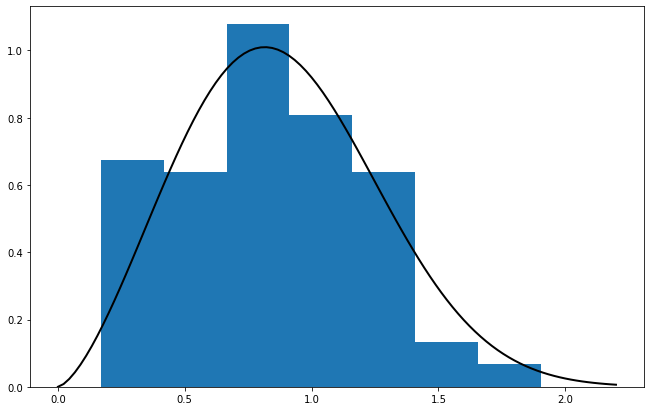

In [24]:
p_x=lambda x2:k*(x2**(k-1))*(math.e**(-x2**k))
x2=np.linspace(0,2.2,100)
plt.figure(figsize=(11,7))
plt.plot(x2,p_x(x2),'k',linewidth = 2)
plt.hist(vyborka,7,density = True)

In [25]:
sum=0
for i in range(len(vyborka)):
    sum+=vyborka[i]
M2=sum/n
M2

0.8405325140632371

In [28]:
sum=0
for i in range(len(vyborka)):
    sum+=vyborka[i]**2
mean=sum/n
D2=mean-M2**2
D2

0.128923979025921

In [30]:
print(abs(M-M2))
print(abs(D-D2))

0.046467485936762865
0.014076020974078979


Неравенство (Дворецкий-Кифер-Волфовиц)

                                    𝑃(sup|𝐹𝑛̂(𝑥)−𝐹(𝑥)|>𝜀)≤2𝑒^(−2𝑛𝜀^2)
                                      𝑥∈ℝ

Таким образом, если 2𝑒^(−2𝑛𝜀^2)=𝛼, ln(2/𝛼)=2𝑛𝜀^2, 𝜀=√((1/2𝑛)ln(2/𝛼)), то с вероятностью 1−𝛼

                                            𝐿(𝑥)≤𝐹𝑛̂(𝑥)≤𝑅(𝑥)
где
                       𝐿(𝑥)=max{𝐹𝑛̂(𝑥)−√(1/2𝑛)ln(2/𝛼),0}, 𝑅(𝑥)=min{𝐹𝑛̂(𝑥)+√(1/2𝑛)ln(2/𝛼),1}.
                  
                  
Построение доверительного интервала

In [31]:
eps=(-math.log(0.1/2)/(2*n))**(1/2)
print("\u03B5 =",eps)

ε = 0.1117238461854718


In [33]:
def ind(x):
    if (x>0):
        return 1
    else :
        return 0
    
def F_emp(x):
    sum_array=[]
    for j in x:
        sum=0
        for i in vyborka:
            sum+=ind(j-i)/n
        sum_array.append(sum)
    return sum_array

In [12]:
def R_x(x):
    femp=F_emp(x)
    ret=[]
    for i in range(len(femp)):
        if (femp[i]+eps<1):
            ret.append(femp[i]+eps)
        else:
            ret.append(1)
    return ret

def L_x(x):
    femp=F_emp(x)
    ret=[]
    for i in range(len(femp)):
        if (femp[i]-eps>0):
            ret.append(femp[i]-eps)
        else:
            ret.append(0)
    return ret

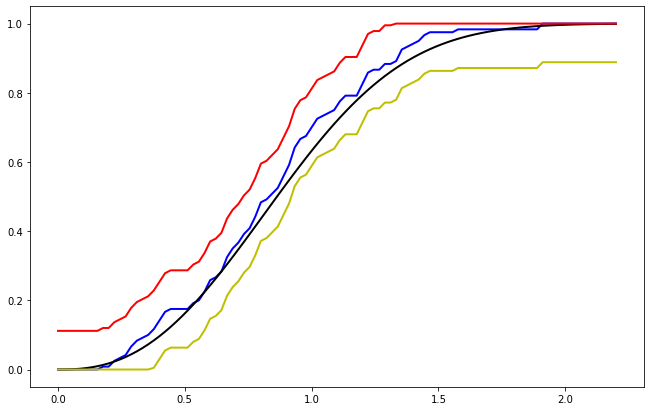

In [34]:
f_x=lambda x:1-math.e**(-x**k)
x=np.linspace(0,2.2,100)
plt.figure(figsize=(11,7))
F_emp(x2)
plt.plot(x,F_emp(x),'b',linewidth = 2)
plt.plot(x,f_x(x),'k',linewidth = 2)
plt.plot(x,R_x(x),'r',linewidth = 2)
plt.plot(x,L_x(x),'y',linewidth = 2)